# Final Data Analysis Notebook

## Hashtag Popularity 

In [ ]:
import tweepy
import random
import time
import json
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import random

from pprint import pprint
from collections import Counter

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

################################################################################################################################

## Reading in Saved Hashtags of Random Sample of Fitness Users

In [18]:
file = 'datasets/hashtag_data.csv'
hashtag_data = pd.read_csv(file)
hashtag_data.head()

# file = 'datasets/hashtag_data_formatted.csv'
# hashtag_data = pd.read_csv(file)
# hashtag_data.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 20: invalid start byte

## Counting Hashtags 

In [ ]:
nopainnogain = 0
cardio = 0
cycling = 0
fitspo = 0
exercise = 0
gym = 0
fitfam = 0
fitlife = 0
fitness = 0
fitnessaddict = 0
gymlife = 0
gymrat = 0
gymtime = 0
marathon = 0
workout = 0
runners = 0
fit = 0
GetFit = 0
motivation = 0
justdoit = 0
TrainHard = 0
bodybuilding = 0

for row in hashtag_data['Tweet']:
    if '#NoPainNoGain' in row:
        nopainnogain +=1
    elif '#Cardio' in row:
        cardio +=1
    elif '#cardio' in row:
        cardio +=1
    elif '#cycling' in row:
        cycling +=1
    elif '#fitspo' in row:
        fitspo +=1
    elif '#exercise' in row:
        exercise +=1
    elif '#Exercise' in row:
        exercise +=1
    elif '#gym' in row:
        gym +=1
    elif '#fitfam' in row:
        fitfam +=1
    elif '#FitFam' in row:
        fitfam +=1
    elif '#fitlife' in row:
        fitlife +=1
    elif '#FitLife' in row:
        fitlife +=1
    elif '#fitness' in row:
        fitness +=1
    elif '#Fitness' in row:
        fitness +=1
    elif '#fitnessaddict' in row:
        fitnessaddict +=1
    elif '#FitnessAddict' in row:
        fitnessaddict +=1
    elif '#gymlife' in row:
        gymlife +=1
    elif '#GymLife' in row:
        gymlife +=1
    elif '#gymrat' in row:
        gymrat +=1
    elif '#gymtime' in row:
        gymtime +=1
    elif '#GymTime' in row:
        gymtime +=1
    elif '#marathon' in row:
        marathon +=1
    elif '#Marathon' in row:
        marathon +=1
    elif '#workout' in row:
        workout +=1
    elif '#Workout' in row:
        workout +=1
    elif '#runners' in row:
        runners +=1
    elif '#Runners' in row:
        runners +=1
    elif '#fit' in row:
        fit +=1
    elif '#Fit' in row:
        fit +=1
    elif '#GetFit' in row:
        GetFit +=1
    elif '#motivation' in row:
        motivation +=1
    elif '#Motivation' in row:
        motivation +=1
    elif '#justdoit' in row:
        justdoit +=1
    elif '#JustDoIt' in row:
        justdoit +=1
    elif '#TrainHard' in row:
        TrainHard +=1
    elif '#bodybuilding' in row:
        bodybuilding +=1    

fitness_hashtags = ["#nopainnogain","#cardio","#cycling","#fitspo","#exercise",
                    "#gym","#fitfam","#fitlife","#fitness","#fitnessaddict","#gymlife",
                    "#gymrat","#gymtime","#marathon","#workout","#runners","#fit","#GetFit",
                    "#motivation","#justdoit","#TrainHard","#bodybuilding"]

fitness_hashtag_counts = [nopainnogain,cardio,cycling,fitspo,exercise,
                          gym,fitfam,fitlife,fitness,fitnessaddict,gymlife,
                          gymrat, gymtime,marathon,workout,runners,fit,GetFit,
                          motivation,justdoit,TrainHard,bodybuilding]

In [ ]:
df_hashtag = pd.DataFrame({'Count':fitness_hashtag_counts,'Hashtag':fitness_hashtags})
sorted_hashtag_df = pd.DataFrame(df_hashtag.sort_values('Count',ascending=False))
sorted_hashtag_df

In [ ]:
x_axis = np.arange(len(sorted_hashtag_df['Hashtag']))
plt.figure(figsize=(18,8))
plt.bar(x_axis, sorted_hashtag_df['Count'], color='b', alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, sorted_hashtag_df['Hashtag'], rotation=45)
plt.xlabel("Hashtags",fontsize =14)
plt.ylabel("Number of Hashtags",fontsize =14)
plt.title("Fitness Hashtags Popularity for Fitness Users",fontsize =14)
plt.savefig("FitnessHashtagPopularity.png")
plt.show()

In [ ]:
gym_df = pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#gym')])
gym_df.reset_index(inplace=True)

motivation_df = pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#motivation|#Motivation')])
motivation_df.reset_index(inplace=True)

fitness_df = pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#fitness|#Fitness')])
fitness_df.reset_index(inplace=True)

fitfam_df= pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#fitfam|#FitFam')])
fitfam_df.reset_index(inplace=True)

justdoit_df = pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#justdoit|#JustDoIt')])
justdoit_df.reset_index(inplace=True)

fitspo_df = pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#fitspo|#Fitspo')])
fitspo_df.reset_index(inplace=True)

fitlife_df = pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#fitlife|#FitLife')])
fitspo_df.reset_index(inplace=True)

fit_df = pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#fit|#Fit')])
fit_df.reset_index(inplace=True)

cycling_df = pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#cycling')])
cycling_df.reset_index(inplace=True)

workout_df = pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#workout|#Workout')])
workout_df.reset_index(inplace=True)

cardio_df = pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#cardio|#Cardio')])
cardio_df.reset_index(inplace=True)

exercise_df = pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#exercise|#Exercise')])
exercise_df.reset_index(inplace=True)

bodybuilding_df = pd.DataFrame(hashtag_data[hashtag_data['Tweet'].str.contains('#bodybuilding')])
bodybuilding_df.reset_index(inplace=True)


In [ ]:
compound_list=[]
positive_list=[]
negative_list=[]
neutral_list=[]

for row in justdoit_df['Tweet']:

    # Run Vader Analysis on each tweet
    results = analyzer.polarity_scores(row)
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]

    # Add each value to the appropriate array
    compound_list.append(compound)
    positive_list.append(pos)
    negative_list.append(neg)
    neutral_list.append(neu)

# Store the Average Sentiments
sentiment_nopainnogain= {
    "Hashtag":'#nopainnogain',
    "Compound": np.mean(compound_list),
}


d = [sentiment_gym,sentiment_motivation,sentiment_fitness,sentiment_fitfam,sentiment_justdoit,sentiment_fitspo,
 sentiment_fitlife, sentiment_fit, sentiment_cycling, sentiment_workout,sentiment_cardio, 
 sentiment_exercise, sentiment_bodybuilding ]
Hashtag_Sentiment_df = pd.DataFrame(d)
Hashtag_Sentiment_df
#####################################


In [ ]:
x_axis = np.arange(len(Hashtag_Sentiment_df['Hashtag']))
plt.figure(figsize=(10,7))
plt.bar(x_axis, Hashtag_Sentiment_df['Compound'], color='r', alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, Hashtag_Sentiment_df['Hashtag'], rotation=45)
plt.xlabel("Hashtags",fontsize=12)
plt.ylabel("Compounds",fontsize=12)
plt.title("Sentiment Compounds of Tweets w/Fitness Hashtags",fontsize=14)
plt.savefig("SentimentAnalysisHashtags.png")
plt.show()

# Fitness/Eating 

In [2]:
# Dependencies
import random
import time
import pandas as pd
import tweepy
import json
import numpy as np
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
# Pull in user account data
users_file = "datasets/merged_lists_032118.csv"

users_df = pd.read_csv(users_file)
users_df.head()
fitness_users = users_df["fitness_users"]
normal_users = users_df["normal_users"]
#normal_users


In [ ]:

#######################

# Separate out fitness users to loop through and search their usage of healthy eating hashtags
fitness_users = users_df["fitness_users"]

# Target Healthy Eating Hashtags
target_tags = ["#EatClean", "#EatLocal", "#FitFood", "#GlutenFree",
                "#HealthyEating", "#HealthyRecipes", "#Nutrition",
              "#protein", "#cleaneating", "#fitnessfood", "#diet", "#plantbased"]

fitness_user_accounts = {}

# Loop through the each of the users
for user in fitness_users:

    # Get all tweets from home feed
    try:
        public_tweets = api.user_timeline(user, count=100)
    except tweepy.error.TweepError:
        print(f"Cannot get the data for {user}. Skipping")
        continue
    
    print(f"Working on getting data for {user}.")
    
    # Add screen name to user list
    if(user not in fitness_user_accounts):
        fitness_user_accounts[user] = 1
            
    # Loop through all tweets
    for tweet in public_tweets:

        # Check to see if the tweets contain the fitness words
        if "#eatclean" in tweet["text"]:
            fitness_user_accounts[user] += 1
        elif "#eatlocal" in tweet["text"]:
            fitness_user_accounts[user] += 1
        elif "#fitfood" in tweet["text"]:
            fitness_user_accounts[user] += 1
        elif "#glutenfree" in tweet["text"]:
            fitness_user_accounts[user] += 1
        elif "#healthyeating" in tweet["text"]:
            fitness_user_accounts[user] += 1
        elif "#healthyrecipes" in tweet["text"]:
            fitness_user_accounts[user] += 1
        elif "#nutrition" in tweet["text"]:
            fitness_user_accounts[user] += 1
        elif "#protein" in tweet["text"]:
            fitness_user_accounts[user] += 1
        elif "#plantbased" in tweet["text"]:
            fitness_user_accounts[user] += 1
        elif "#diet" in tweet["text"]:
            fitness_user_accounts[user] += 1
        elif "#cleaneating" in tweet["text"]:
            fitness_user_accounts[user] += 1
        elif "fitnessfood" in tweet["text"]:
            fitness_user_accounts[user] += 1
        
    # Set to sleep to avoid surpassing API rate limits
    time.sleep(15)
    
# View         
print(fitness_user_accounts)

#####################################
fitness_user_accounts_pd = pd.Series(fitness_user_accounts)

fitness_user_accounts_pd.sort_values(ascending=False)

#######################################

# TEST #

test_fitness_users = ["SupraSonicIrish"]
test_fitness_user_accounts = {}

# Loop through the each of the users
for user in test_fitness_users:

    # Get all tweets from home feed
    try:
        public_tweets = api.user_timeline(user, count=100)
    except tweepy.error.TweepError:
        print(f"Cannot get the data for {user}. Skipping")
        continue
    
    print(f"Working on getting data for {user}.")
    
    # Add screen name to user list
    if(user not in test_fitness_user_accounts):
        test_fitness_user_accounts[user] = 1
            
    # Loop through all tweets
    for tweet in public_tweets:
        print(tweet["text"])

        # Check to see if the tweets contain the fitness words
        if "#eatclean" in tweet["text"]:
            test_fitness_user_accounts[user] += 1
        elif "#eatlocal" in tweet["text"]:
            test_fitness_user_accounts[user] += 1
        elif "#fitfood" in tweet["text"]:
            test_fitness_user_accounts[user] += 1
        elif "#glutenfree" in tweet["text"]:
            test_fitness_user_accounts[user] += 1
        elif "#healthyeating" in tweet["text"]:
            test_fitness_user_accounts[user] += 1
        elif "#healthyrecipes" in tweet["text"]:
            test_fitness_user_accounts[user] += 1
        elif "#nutrition" in tweet["text"]:
            test_fitness_user_accounts[user] += 1
        elif "#protein" in tweet["text"]:
            test_fitness_user_accounts[user] += 1
        elif "#plantbased" in tweet["text"]:
            test_fitness_user_accounts[user] += 1
        elif "#diet" in tweet["text"]:
            test_fitness_user_accounts[user] += 1
        elif "#cleaneating" in tweet["text"]:
            test_fitness_user_accounts[user] += 1
        elif "fitnessfood" in tweet["text"]:
            test_fitness_user_accounts[user] += 1
        
    # Set to sleep to avoid surpassing API rate limits
    time.sleep(15)
    
# View         
print(test_fitness_user_accounts)

###################################################

# Separate out normal users to loop through and search their usage of healthy eating hashtags
normal_users = users_df["normal_users"]

# Create an empty array to hold the data

normal_user_accounts = {}
user_num = 0

# Loop through the each of the users
for user in normal_users:
    
    # Add a number to user_num to track the progress
    user_num += 1

    # Get all tweets from home feed
    try:
        public_tweets = api.user_timeline(user, count=100)
    except tweepy.error.TweepError:
        print(f"Cannot get the data for {user}. Skipping")
        continue
    
    print(f"Working on getting data for {user} who is {user_num}.")
    
    # Add screen name to user list
    if(user not in normal_user_accounts):
        normal_user_accounts[user] = 1
            
    # Loop through all tweets
    for tweet in public_tweets:

        # Check to see if the tweets contain the fitness words
        if "#eatclean" in tweet["text"]:
            normal_user_accounts[user] += 1
        elif "#eatlocal" in tweet["text"]:
            normal_user_accounts[user] += 1
        elif "#fitfood" in tweet["text"]:
            normal_user_accounts[user] += 1
        elif "#glutenfree" in tweet["text"]:
            normal_user_accounts[user] += 1
        elif "#healthyeating" in tweet["text"]:
            normal_user_accounts[user] += 1
        elif "#healthyrecipes" in tweet["text"]:
            normal_user_accounts[user] += 1
        elif "#nutrition" in tweet["text"]:
            normal_user_accounts[user] += 1
        elif "#protein" in tweet["text"]:
            normal_user_accounts[user] += 1
        elif "#plantbased" in tweet["text"]:
            normal_user_accounts[user] += 1
        elif "#diet" in tweet["text"]:
            normal_user_accounts[user] += 1
        elif "#cleaneating" in tweet["text"]:
            normal_user_accounts[user] += 1
        elif "fitnessfood" in tweet["text"]:
            normal_user_accounts[user] += 1
    
    
    # Set to sleep to avoid surpassing API rate limits
    time.sleep(20)
    
# View         
print(normal_user_accounts)

##########################################
normal_user_accounts_pd = pd.Series(normal_user_accounts)

normal_user_accounts_pd.sort_values(ascending=False)

##########################################
# Adjust arrays to reflect that I started all usernames with 1

fitness_user_accounts_pd = fitness_user_accounts_pd + 1
normal_user_accounts_pd = normal_user_accounts_pd + 1

fitness_user_accounts_pd
normal_user_accounts_pd
#########################################
# Find the means for each group
normal_mean = np.mean(normal_user_accounts_pd)
fitness_mean = np.mean(fitness_user_accounts_pd)
fitness_mean
normal_mean
#########################################

# Plot the results

means = [fitness_mean, normal_mean]

users = ["Fitness", "Normal"]
x_axis = np.arange(len(users))

plt.bar(x_axis, means, color='g', alpha=0.5, align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["Fitness", "Normal"])
plt.xlabel("User Groups")
plt.ylabel("Mean of hashtags per 100 tweets")
plt.title("Mean of Healthy Eating Hashtags over 500 Users")
plt.savefig("fitness_normal.png")

plt.show()

fitness_user_accounts_pd.to_csv("fitness_eating_tags.csv", encoding='utf-8')

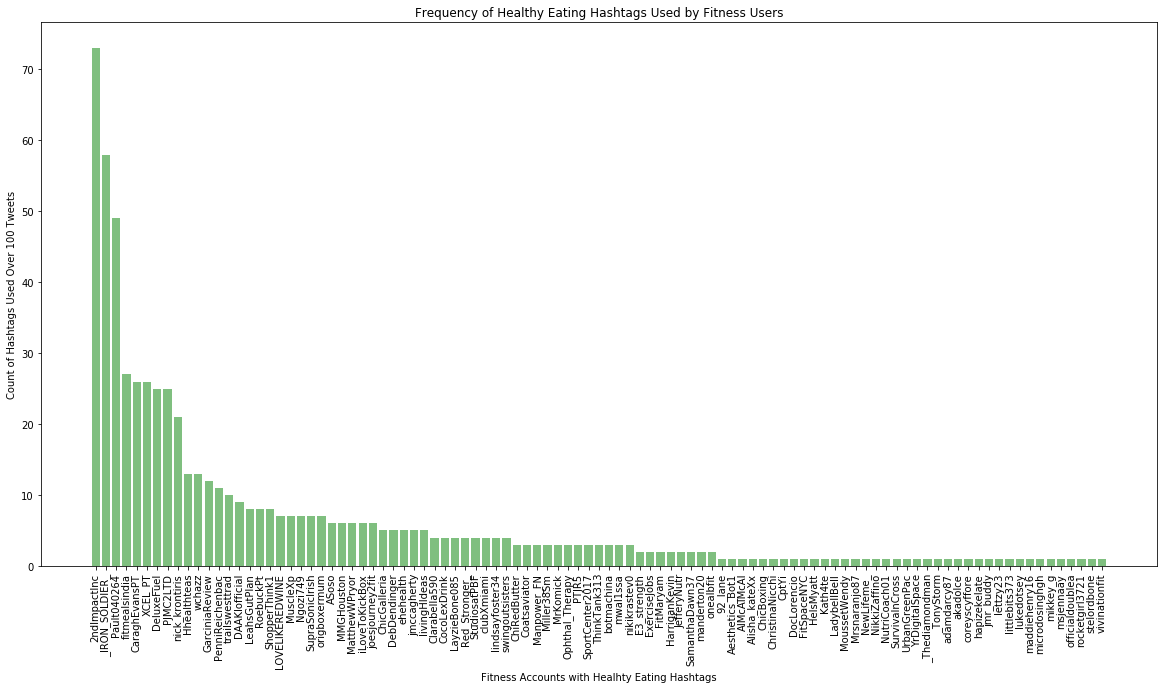

In [9]:
eating_file = "datasets/fitness_eating_tags.csv"

eating_df = pd.read_csv(eating_file)
#eating_df

# Plot the hashtag info for fitness users
x_axis = np.arange(len(eating_df['Account']))
x_axis
plt.figure(figsize=(20,10))
plt.bar(x_axis, eating_df['Count'], color='g', alpha=0.5, align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, eating_df['Account'], rotation=90)
plt.xlabel("Fitness Accounts with Healhty Eating Hashtags")
plt.ylabel("Count of Hashtags Used Over 100 Tweets")
plt.title("Frequency of Healthy Eating Hashtags Used by Fitness Users")
plt.savefig("healthy_eating_#.png")

plt.show()

In [13]:
# Average number of healthy eating hastags over last 100 tweets
eating_df['Count'].mean()

6.404040404040404

In [14]:
# Take out possible outliers
eating_df_new = eating_df.loc[eating_df['Count'] < 40]
eating_df_new['Count'].mean()

4.729166666666667

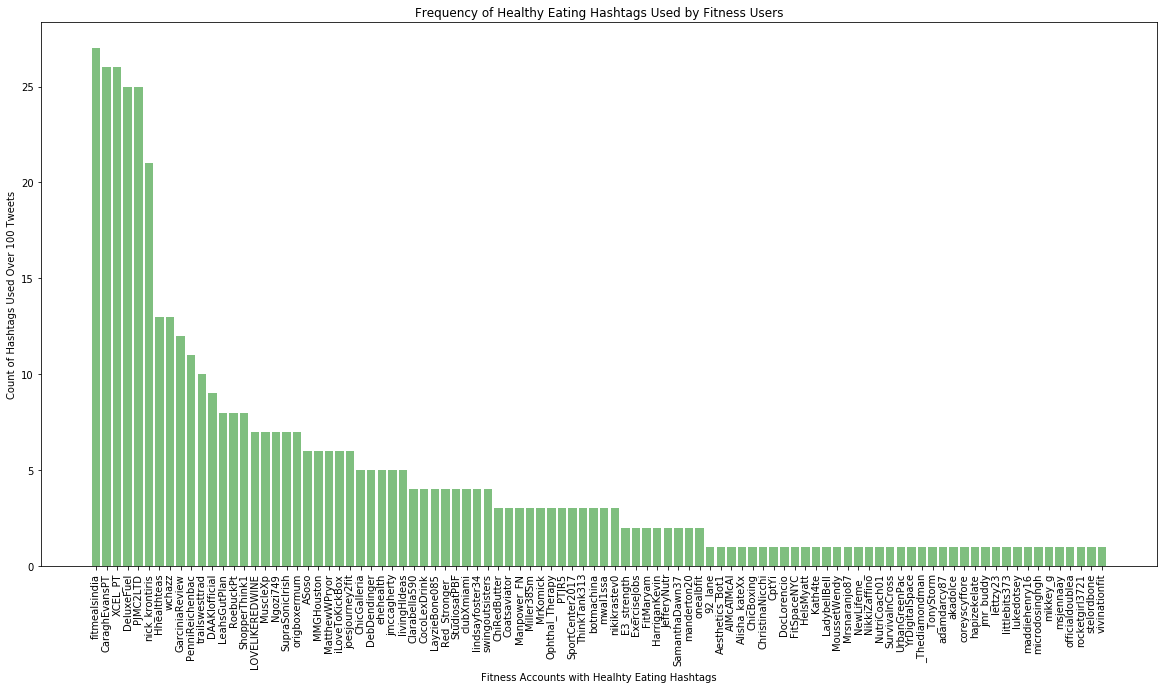

In [12]:
# Plot the hashtag info for fitness users
x_axis = np.arange(len(eating_df_new['Account']))
x_axis
plt.figure(figsize=(20,10))
plt.bar(x_axis, eating_df_new['Count'], color='g', alpha=0.5, align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, eating_df_new['Account'], rotation=90)
plt.xlabel("Fitness Accounts with Healhty Eating Hashtags")
plt.ylabel("Count of Hashtags Used Over 100 Tweets")
plt.title("Frequency of Healthy Eating Hashtags Used by Fitness Users")
plt.savefig("healthy_eating_#.png")

plt.show()

# Setting up for TTest 

In [23]:
# Dependencies
import tweepy
import random
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem, ttest_ind

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [19]:
fit_file = "datasets/fit_tweets.csv"
norm_file = "datasets/norm_tweets1.csv"

fit_tweets = pd.read_csv(fit_file, encoding='utf-8')
norm_tweets = pd.read_csv(norm_file, encoding='utf-8')
fit_tweets = fit_tweets.dropna()
norm_tweets = norm_tweets.dropna()
if len(fit_tweets) < len(norm_tweets):
    norm_tweets = norm_tweets.sample(n=len(fit_tweets))
else:
    fit_tweets = fit_tweets.sample(n=len(norm_tweets))


## Getting means 

In [20]:
norm_acct_groups = norm_tweets.groupby('Account')
norm_mean_sents = (norm_acct_groups['Compound'].mean()).tolist()
norm_mean_poss = (norm_acct_groups['Positive'].mean()).tolist()
norm_mean_neus = (norm_acct_groups['Neutral'].mean()).tolist()
norm_mean_negs = (norm_acct_groups['Negative'].mean()).tolist()

fit_acct_groups = fit_tweets.groupby('Account')
fit_mean_sents = (fit_acct_groups['Compound'].mean()).tolist()
fit_mean_poss = (fit_acct_groups['Positive'].mean()).tolist()
fit_mean_neus = (fit_acct_groups['Neutral'].mean()).tolist()
fit_mean_negs = (fit_acct_groups['Negative'].mean()).tolist()

sent_comparison = pd.DataFrame({
    'Fitness User':[np.nanmean(fit_mean_sents),np.nanmean(fit_mean_poss),np.nanmean(fit_mean_negs),np.nanmean(fit_mean_neus)],
    'Normal User':[np.nanmean(norm_mean_sents),np.nanmean(norm_mean_poss),np.nanmean(norm_mean_negs),np.nanmean(norm_mean_neus)],
    'Value':['Compound','Positive','Negative','Neutral']
})
sent_comparison = sent_comparison.set_index("Value") 
#sent_comparison.to_csv('sent_comparison.csv',encoding='utf-8')
sent_comparison   


,Fitness User,Normal User
Value,,
Compound,0.182979,0.105530
Positive,0.116532,0.104569
Negative,0.032617,0.054361
Neutral,0.850749,0.841071


## Removing neutrals (removing compound score = 0)

In [21]:
sented_n_tweets = norm_tweets.loc[norm_tweets['Compound']!=0]
sented_f_tweets = fit_tweets.loc[fit_tweets['Compound']!=0]

norm_acct_groups = sented_n_tweets.groupby('Account')
norm_mean_sents = (norm_acct_groups['Compound'].mean()).tolist()
norm_mean_poss = (norm_acct_groups['Positive'].mean()).tolist()
norm_mean_neus = (norm_acct_groups['Neutral'].mean()).tolist()
norm_mean_negs = (norm_acct_groups['Negative'].mean()).tolist()

fit_acct_groups = sented_f_tweets.groupby('Account')
fit_mean_sents = (fit_acct_groups['Compound'].mean()).tolist()
fit_mean_poss = (fit_acct_groups['Positive'].mean()).tolist()
fit_mean_neus = (fit_acct_groups['Neutral'].mean()).tolist()
fit_mean_negs = (fit_acct_groups['Negative'].mean()).tolist()

sented_comparison = pd.DataFrame({
    'Fitness User':[np.nanmean(fit_mean_sents),np.nanmean(fit_mean_poss),np.nanmean(fit_mean_negs),np.nanmean(fit_mean_neus)],
    'Normal User':[np.nanmean(norm_mean_sents),np.nanmean(norm_mean_poss),np.nanmean(norm_mean_negs),np.nanmean(norm_mean_neus)],
    'Value':['Compound','Positive','Negative','Neutral']
})
sented_comparison = sented_comparison.set_index("Value") 
#sented_comparison.to_csv('sent_comparison_drop_neu.csv',encoding='utf-8')
sented_comparison

,Fitness User,Normal User
Value,,
Compound,0.316328,0.188710
Positive,0.206695,0.185466
Negative,0.057690,0.094504
Neutral,0.735615,0.720031


## TTest Summary

In [24]:
probs = []
t_vals = []
sented_n_groups = sented_n_tweets.groupby('Account')
norm_mean_sents = (sented_n_groups['Compound'].mean()).tolist()
sented_f_groups = sented_f_tweets.groupby('Account')
fit_mean_sents = (sented_f_groups['Compound'].mean()).tolist()
(ttest,p) = ttest_ind(norm_mean_sents,fit_mean_sents,equal_var=True)
probs.append(p)
t_vals.append(ttest)

neu_n_groups = norm_tweets.groupby('Account')
neu_n_sents = (neu_n_groups['Compound'].mean()).tolist()
neu_f_groups = fit_tweets.groupby('Account')
neu_f_sents = (neu_f_groups['Compound'].mean()).tolist()
(ttest,p) = ttest_ind(neu_n_sents,neu_f_sents,equal_var=True)
probs.append(p)
t_vals.append(ttest)

ttest_summ = pd.DataFrame({
    'Neutrals':['N','Y'],
    'T-Score':t_vals,
    'P-Value':probs,
    'Mean Fitness Sent':[sented_comparison.iloc[0,0],sent_comparison.iloc[0,0]],
    'Mean Normal Sent':[sented_comparison.iloc[0,1],sent_comparison.iloc[0,1]]
})

ttest_summ = ttest_summ.set_index('Neutrals')
ttest_summ.to_csv('ttest_summary.csv')
ttest_summ

,Mean Fitness Sent,Mean Normal Sent,P-Value,T-Score
Neutrals,,,,
N,0.316328,0.18871,1.374114e-17,-8.703730
Y,0.182979,0.10553,1.765882e-16,-8.382486


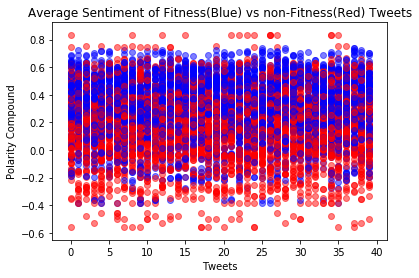

In [25]:
fig,ax = plt.subplots()
x_axis = np.arange(0,40)
for x in range(100):
    norm_sample = random.sample(norm_mean_sents,40)
    fit_sample = random.sample(fit_mean_sents,40)
    ax.scatter(x_axis, norm_sample, color='red',alpha=.5,label='Normal Users')
    ax.scatter(x_axis, fit_sample, color='blue',alpha=.5,label='Fitness Users')
    
plt.xlabel("Tweets")
plt.ylabel("Polarity Compound")
plt.title("Average Sentiment of Fitness(Blue) vs non-Fitness(Red) Tweets")
plt.savefig('user_summary_scatter.png')
plt.show()

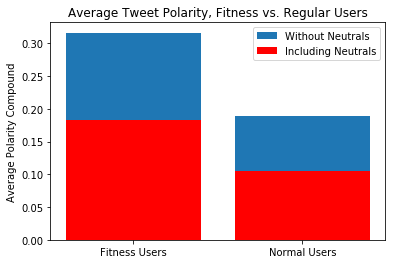

In [26]:
x_axis = np.arange(2)
tick_labels = ['Fitness Users','Normal Users']
fig,ax = plt.subplots()
ax.bar(x_axis,sented_comparison.iloc[0,:],label='Without Neutrals')
ax.bar(x_axis,sent_comparison.iloc[0,:],color='red',label='Including Neutrals')
plt.xticks(x_axis,tick_labels)
plt.ylabel('Average Polarity Compound')
plt.title('Average Tweet Polarity, Fitness vs. Regular Users')
plt.legend()
plt.savefig('user_summary_bar.png')
plt.show()